In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') 
temp['month'] = pd.to_datetime(temp['Date']).dt.month 

month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

temp['month'] = temp['month'].map(month_dict)

month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

In [6]:
temp.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,month,mean_month
0,1/1/1948,10,8.0,7.0,january,4.493982
1,1/2/1948,6,4.0,3.0,january,4.493982
2,1/3/1948,7,4.0,2.0,january,4.493982
3,1/4/1948,7,4.0,2.0,january,4.493982
4,1/5/1948,7,3.0,0.0,january,4.493982


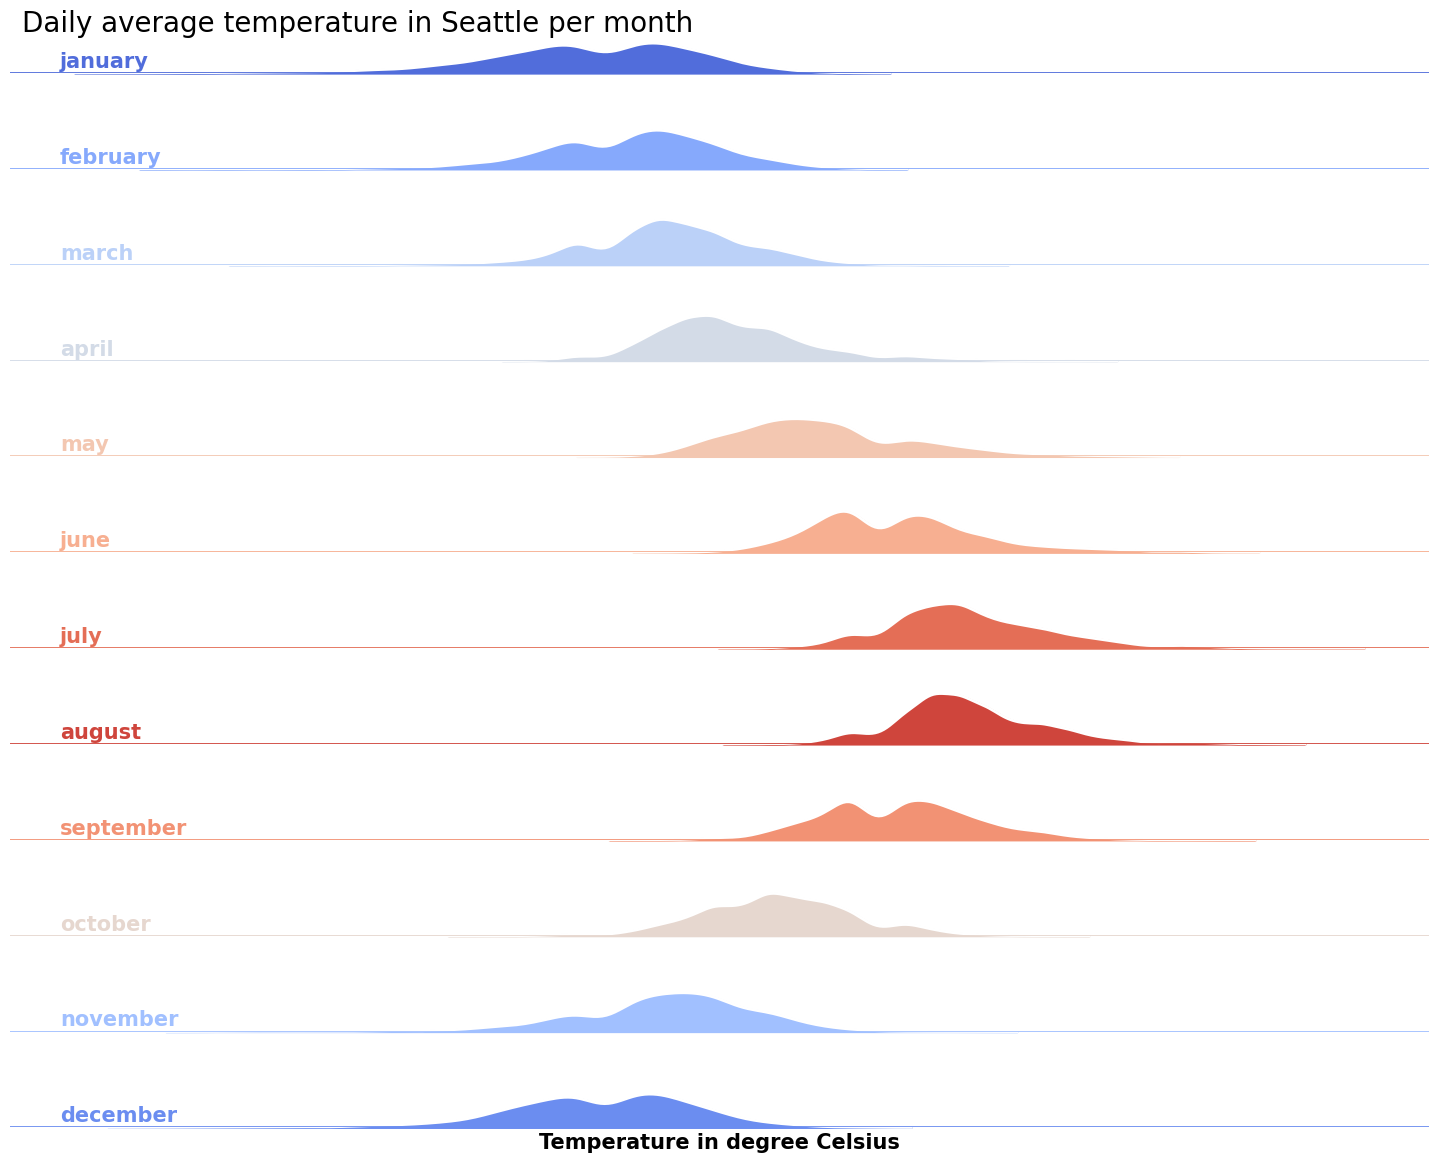

In [31]:
pal = sns.color_palette(palette='coolwarm', n_colors=12)

g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=1, palette=pal)
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# 그림 추가
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

g.set_titles("")
g.set(yticks=[])
g.set(xticks=[])
g.set(ylabel='')
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()